In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [2]:
df = pd.read_csv('../data/mars.csv')

In [3]:
df = df[['Height_km', 'LowDensity_kgm3', 'Density_kgm3', 'HighDensity_kgm3']]

In [4]:
df['minus_3_sigma'] = df['Density_kgm3'] - (df['Density_kgm3'] - df['LowDensity_kgm3'])*3
df['plus_3_sigma'] = df['Density_kgm3'] + (df['HighDensity_kgm3'] - df['Density_kgm3'])*3

In [5]:
df['minus_3_sigma_pct'] = ((df['minus_3_sigma'] - df['Density_kgm3'])/df['Density_kgm3'])*100
df['plus_3_sigma_pct'] = ((df['plus_3_sigma'] - df['Density_kgm3'])/df['Density_kgm3'])*100

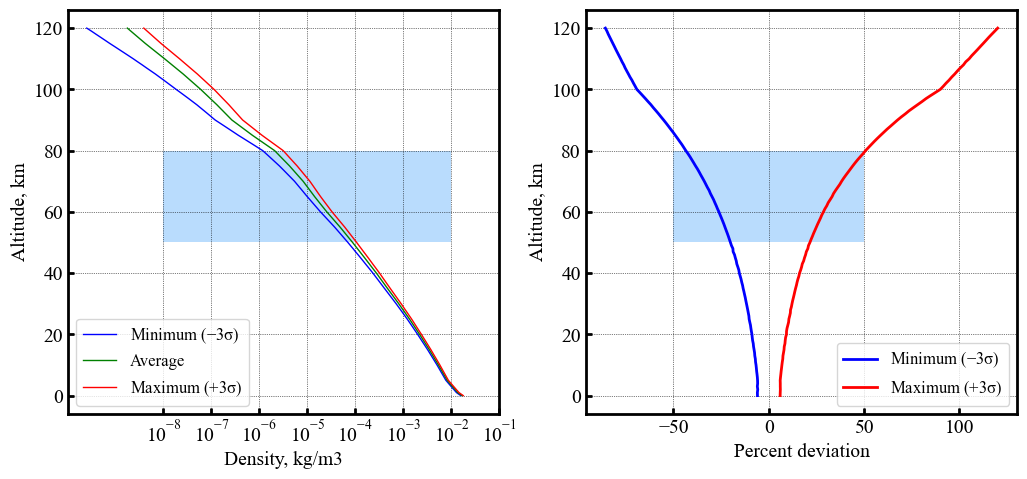

In [8]:
fig = plt.figure()
fig.set_size_inches([12.25, 5.25])

plt.subplot(1, 2, 1)
plt.rc('font',family='Times New Roman')
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

plt.plot(df['minus_3_sigma'], df['Height_km'], 'b-', linewidth=1.0, label="Minimum "+r"$(-3\sigma)$")
plt.plot(df['Density_kgm3'] , df['Height_km'], 'g-', linewidth=1.0, label="Average")
plt.plot(df['plus_3_sigma'], df['Height_km'], 'r-', linewidth=1.0, label="Maximum "+r"$(+3\sigma)$")
plt.xlabel("Density, kg/m3",fontsize=14)
plt.ylabel("Altitude, km",fontsize=14)
plt.xscale('log')
plt.yticks(fontsize=14)
plt.xticks(np.logspace(-8, -1, 8), fontsize=14)
plt.grid('on',linestyle='-', linewidth=0.2)

ax=plt.gca()
ax.xaxis.set_tick_params(direction='in', which='both')
ax.yaxis.set_tick_params(direction='in', which='both')
ax.xaxis.set_tick_params(width=2, length=4)
ax.yaxis.set_tick_params(width=2, length=4)
ax.xaxis.set_tick_params(width=1, length=4, which='minor')
ax.yaxis.set_tick_params(width=1, length=4, which='minor')
ax.xaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
ax.xaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)
ax.yaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
ax.yaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)
ax.add_patch(Rectangle((1E-8, 50), 0.01, 30, alpha=0.5, facecolor='xkcd:sky blue'))

for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(2)

plt.legend(loc='lower left', fontsize=12, framealpha=0.8)

plt.subplot(1, 2, 2)
plt.rc('font',family='Times New Roman')
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

plt.plot(df['minus_3_sigma_pct'], df['Height_km'], 'b-', linewidth=2.0, label="Minimum "+r"$(-3\sigma)$")
plt.plot(df['plus_3_sigma_pct'], df['Height_km'], 'r-', linewidth=2.0, label="Maximum "+r"$(+3\sigma)$")
plt.xlabel("Percent deviation",fontsize=14)
plt.ylabel("Altitude, km",fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.grid('on',linestyle='-', linewidth=0.2)

ax=plt.gca()
ax.xaxis.set_tick_params(direction='in', which='both')
ax.yaxis.set_tick_params(direction='in', which='both')
ax.xaxis.set_tick_params(width=2, length=4)
ax.yaxis.set_tick_params(width=2, length=4)
ax.xaxis.set_tick_params(width=1, length=4, which='minor')
ax.yaxis.set_tick_params(width=1, length=4, which='minor')
ax.xaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
ax.xaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.5)
ax.yaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
ax.yaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.5)
ax.add_patch(Rectangle((-50, 50), 100, 30, alpha=0.5, facecolor='xkcd:sky blue'))

for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(2)

plt.legend(loc='lower right', fontsize=12, framealpha=0.8)
plt.savefig('../atmospheric-uncertainties-plots/mars.png', dpi=300, bbox_inches='tight')
plt.show()